ALL Implementation are from this video and they will be little bit modified
https://youtube.com/playlist?list=PLhhyoLH6IjfwIp8bZnzX8QR30TRcHO8Va&si=6l_kJAuCYCx6YTmp

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm

# **Pix -2 - Pix Paper implementation**

* It is basically a conditional GAN with normal discrimninator loss as loss function for generator rather than using WGAN loss which gives bad results in this case
* Here we use L1 loss added into discriminator as L2 loss produces blurry images
* Here they have UNET architecture for generator and for discriminator they have used normal encoder - decoder architecture
* Here they used PatchGAN which is discriminator architecture that scans whole  one image by one patch by patch predicting that patch is real or fake

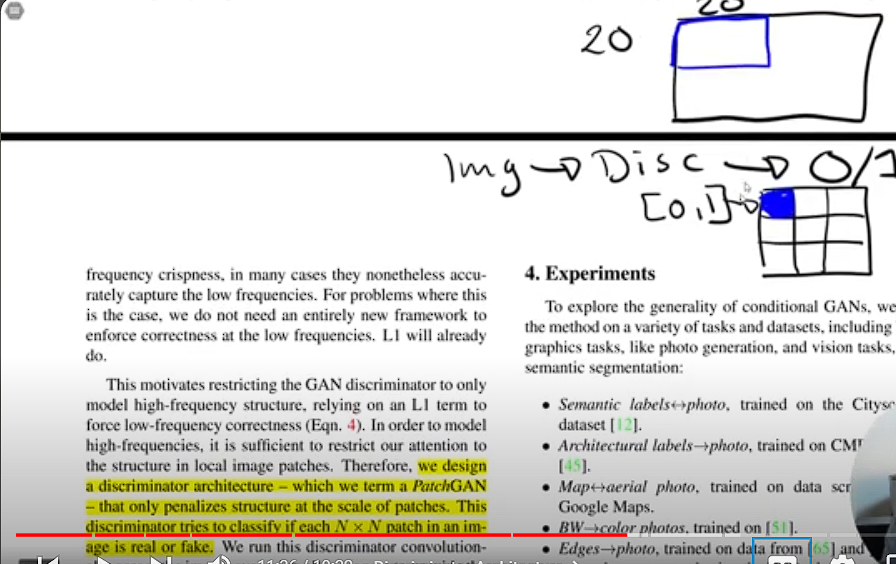

* Hyper Parameters are Adam Optimizer and Beta 1 =0.5 and beta2 = 0.999 learning rate was 0.0002
* Patch size: they tried 1X1, 16x16, 70x70, 286x286 (whole image)
of these patch size 70x70 showed slightly good results than 16x16
* Network Architecture :
  * They have used Ck which denotes Convolution-BatchNorm-ReLU with k filters.
  * They have used CDk which denotes convolution-BatchNorm-DropOut-ReLU with k filters with dropout rate of 50% here all convolution kernel size is of 4x4 with stride of 2
  * Here they encoder downsample the image by factor of 2 and upsample by factor of 2 in decoder
* Generator Architecture:
  * encoder:
  C64-C128-C256-C512-C512-C512-C512-C512
  * Decoder without skip connection:
  CD512-CD512-CD512-C512-C256-C128-C64
  * after last layer in the decoder a convolution is applied to map to the number of output channel (3 in general except in clorization, where it is 2) followed by Tanh function and BatchNormalization is not applied at C64 layer in encoder
  * All ReLU in the encoder are leaky with slope 0.2 while ReLU in the decoder are not leaky
  * U-Net Decoder with skip connections:CD512-CD1024-CD1024-C1024-C1024-C512-C256-C128
* Discriminator Architecture:
  * The 70x70 Patch Discriminator: C64-C128-C256-C512
    * After last layer Convolution is applied to map to 1 dimensional output followed by a sigmoid function and BatchNorm is not applied at first C64 layer
    * All ReLU are Leky with 0.2 slope
  * 1x1 Patch Discriminator : C64-C128 (with 1x1 kernel)
  * 16x16 Patch Discriminator : C64-C128
  * 286x286 Patch Discriminator : C64-C128-C256-C512-C512-C512

* Training:
  * Weights are intialized from Gaussian distribution with mean of 0 and standard deviation of 0.02